In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic') 
%matplotlib inline

# 1. openAPI 활용 및 json 데이터 읽기
## API : Application Programming Interface
## 서울시 데이터 포털에서 공공 API 활용하기
### 서울시 동별 인구통계
### http://data.seoul.go.kr/dataList/datasetView.do?infId=10043&srvType=S&serviceKind=2&currentPageNo=1

In [2]:
import requests # api 사용시 필요

In [18]:
url = 'http://openapi.seoul.go.kr:8088'
api_key = 'sample' #개인인증키 발급받은 후, 입력
return_format = 'json'
service_id = 'octastatapi10043'
start_idx = 1
end_idx = 5

request_url = '/'.join([url, api_key, return_format, service_id, str(start_idx), str(end_idx)])
print(request_url)
# 'http://openapi.seoul.go.kr:8088/sample/json/octastatapi10043/1/500/' 


http://openapi.seoul.go.kr:8088/sample/json/octastatapi10043/1/5


In [16]:
response = requests.get(request_url)
# 주소창에 주소를 치고 엔터치는 격

In [17]:
response.text
#JSON 형태

'<RESULT><CODE>ERROR-335</CODE><MESSAGE><![CDATA[샘플데이터(샘플키:sample) 는 한번에 최대 5건을 넘을 수 없습니다.\n요청시작위치와  요청종료위치 값은 1 ~ 5 사이만 가능합니다.]]></MESSAGE></RESULT>'

### json (Java Script Object Notation)

### 1) json 설명: https://ko.wikipedia.org/wiki/JSON
### 2) json online editor: https://jsoneditoronline.org/

In [3]:
sample = ' { \
    "이름": "김지아", \
    "나이": 25, \
    "성별": "여", \
    "주소": "서울특별시 양천구 목동",\
    "특기": ["농구", "도술"],\
    "가족관계": {"#": 2, "아버지": "홍판서", "어머니": "춘섬"},\
    "회사": "경기 수원시 팔달구 우만동"\
 }'

In [4]:
import json # 사전타입으로 바꿔줌

In [5]:
jsonsample = json.loads(sample)

In [8]:
type(jsonsample)

dict

In [6]:
# json의 특정 항목에 접근
jsonsample['가족관계']['아버지']

'홍판서'

In [13]:
#API 결과를 json 포맷으로 변환
jsondata =response.json()

In [14]:
jsondata = jsondata['octastatapi10043']['row']
동별인구통계 = DataFrame(jsondata)
동별인구통계

,DONG,GIGAN,GYE_1,GYE_2,GYE_3,JACHIGU,NAMJA_1,NAMJA_2,NAMJA_3,N_65SEISANGGORYEONGJA,SEDAE,SEDAEDANGINGU,YEOJA_1,YEOJA_2,YEOJA_3
0,합계,2016,10204057,9930616,273441,합계,5007379,4876789,130590,1300877,4189839,2.37,5196678,5053827,142851
1,소계,2016,161922,152737,9185,종로구,79322,75201,4121,25091,72118,2.12,82600,77536,5064
2,사직동,2016,10013,9695,318,종로구,4605,4429,176,1707,4399,2.20,5408,5266,142
3,삼청동,2016,3118,2903,215,종로구,1491,1377,114,624,1403,2.07,1627,1526,101
4,부암동,2016,11044,10616,428,종로구,5349,5160,189,1723,4371,2.43,5695,5456,239


# 2. folium 을 활용한 지도 시각화

In [97]:
#folium 라이브러리 설치
# anaconda prompt에서 'pip install folium' 실행
import folium

In [18]:
map1 = folium.Map(location = [37.5, 126.9], zoom_start = 10)
map1
# 서울시청을 지도의 중심으로, 지도를 그려줌. 
# zoom_start는 지도를 그릴 때 얼마나 zoom 해서 보여줄 지를 결정.  값이 클수록, zoom in

In [21]:
# Marker 추가하기 (지도에 지점 추가하기)
folium.Marker([37.3, 126], popup = '테스트지점').add_to(map1)

In [22]:
map1

In [99]:
# 조사지점 위치 읽어오기
조사지점 = pd.read_excel('data/서울시유동인구/4_유동인구_조사지점정보_2015.xlsx', 
                      skiprows = [0,1,3])
측정위치.head()

,조사지점코드,조사지점명,구코드,동코드,주번지,부번지,도로명,보도너비,차선수,버스차로유무,...,지구중심상세내용,도심부도심지역명,용도구분,거주유형구분,입지유형명,X좌표,Y좌표,집계구코드,년도,조사구분
0,01-003,신흥모피명품전문크리닝.,11010.0,1101055.0,127,11,NaN,3.0,8.0,유,...,NaN,NaN,2종주거,NaN,NaN,196423.97707,455511.52968,1.101055e+12,2015,본조사
1,01-004,GS25,11010.0,1101055.0,94,2,세검정로 230,3.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196315.80243,455621.38262,1.101055e+12,2015,본조사
2,01-005,세검정정류장,11010.0,1101055.0,92,0,세검정길,4.0,5.0,유,...,NaN,NaN,1종주거,NaN,NaN,196357.17125,455680.82580,1.101055e+12,2015,본조사
3,01-008,안성타워內 굿모닝파워공인중개사.,11010.0,1101056.0,72,72,NaN,4.0,4.0,유,...,NaN,NaN,2종주거,NaN,NaN,197904.19277,456718.34996,1.101056e+12,2015,본조사
4,01-009,복실 손뜨기.,11010.0,1101056.0,88,46,NaN,2.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196360.44943,456405.89296,1.101056e+12,2015,본조사


In [11]:
측정위치50 = 측정위치[['조사지점명', 'X좌표', 'Y좌표']].iloc[:50]
측정위치50
# 50개의 측정 위치에 대해 필요한 정보만 저장

,조사지점명,X좌표,Y좌표
0,신흥모피명품전문크리닝.,196423.97707,455511.52968
1,GS25,196315.80243,455621.38262
2,세검정정류장,196357.17125,455680.82580
3,안성타워內 굿모닝파워공인중개사.,197904.19277,456718.34996
4,복실 손뜨기.,196360.44943,456405.89296
5,24시 동대문 설렁탕.,200966.43423,452483.73642
6,서울전문학교.,201686.66781,452747.41594
7,서울 종묘농약,200231.75517,452355.91115
8,서울 종묘농약,200231.75517,452355.91115
9,삼성카드빌딩,199935.57893,452934.78947


In [109]:
# 위치 정보 변환을 위한 라이브러리 설치
# pip install pyproj
#conda install pyproj
from pyproj import Proj, transform

In [110]:
# X좌표, Y좌표를 위도와 경도로 변환하는 함수 선언
def convert(x,y):
    inProj = Proj(init = 'epsg:5181')
    outProj = Proj(init = 'epsg:4326')
    x2,y2 = transform(inProj, outProj, x, y)
    return [y2, x2]

In [25]:
#측정위치50에 위도와 경도 정보를 추가 # row 단위 # lambda : row의 갯수만큼 반복하게 도와줌
측정위치50['위경도'] = 측정위치50.apply(lambda 지점: convert(지점['X좌표'], 지점['Y좌표']), axis = 1)
측정위치50.head(3)

,조사지점명,X좌표,Y좌표,위경도
0,신흥모피명품전문크리닝.,196423.97707,455511.52968,"[37.5991696223151, 126.95950527754184]"
1,GS25,196315.80243,455621.38262,"[37.60015896037769, 126.95827976042075]"
2,세검정정류장,196357.17125,455680.82580,"[37.60069470246659, 126.95874792945385]"


In [28]:
#측정위치 50개를 지도에 표시
for row in 측정위치50.iterrows():
    folium.Marker(row[1]['위경도'], popup = row[1]['조사지점명']).add_to(map1)

In [29]:
map1

In [30]:
map1.save('map_img1.html')

# 3. 서울시 유동인구 분석

## 데이터 적재

In [22]:
# 데이터 적재
유동인구 = pd.read_excel('data/서울시유동인구/0_유동인구_유동인구기본_2015.xlsx', 
                      skiprows = [0,1,3])
유동인구.head()

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도
0,1,30-001,지하철,금,07시-08시,129.0,2015
1,2,30-001,지하철,금,08시-09시,112.5,2015
2,3,30-001,지하철,금,09시-10시,108.0,2015
3,4,30-001,지하철,금,10시-11시,94.5,2015
4,5,30-001,지하철,금,11시-12시,87.0,2015


In [34]:
data = pd.read_excel('data/서울시유동인구/4_유동인구_조사지점정보_2015.xlsx', 
                     sheet_name = None, skiprows = [0,1,3])
# 구코드, 동코드, 구명, 동명 

In [35]:
data.keys()
# 5개의 시트정보

odict_keys(['유동인구_조사지점정보_2015', 'FTPTH_STLE_CN', 'GU_CD', 'DONG_CD', 'SM_GU_CD'])

In [38]:
조사지점 = data.get('유동인구_조사지점정보_2015')
구코드 = data.get('GU_CD')
동코드 = data.get('DONG_CD')
집계구코드 = data.get('SM_GU_CD')

In [36]:
유동인구.head(1)

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도
0,1,30-001,지하철,금,07시-08시,129.0,2015


In [39]:
집계구코드.head(1)

,집계구코드,구코드,동코드,구명,동명,연도,집계구명칭
0,1104070010005,1104,1104070,성동구,용답동,2013,영해약국


In [40]:
조사지점.head(1)

,조사지점코드,조사지점명,구코드,동코드,주번지,부번지,도로명,보도너비,차선수,버스차로유무,...,지구중심상세내용,도심부도심지역명,용도구분,거주유형구분,입지유형명,X좌표,Y좌표,집계구코드,년도,조사구분
0,01-003,신흥모피명품전문크리닝.,11010.0,1101055.0,127,11,NaN,3.0,8.0,유,...,NaN,NaN,2종주거,NaN,NaN,196423.97707,455511.52968,1.101055e+12,2015,본조사


In [42]:
유동인구 = pd.merge(유동인구, 조사지점[['조사지점코드', '조사지점명', '구코드', '동코드', 'X좌표', 'Y좌표', '집계구코드']])

In [43]:
유동인구 = pd.merge(유동인구, 구코드[['구코드', '구명']])

In [44]:
유동인구 = pd.merge(유동인구, 동코드[['동코드', '동명']])

In [45]:
유동인구.head(2)

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도,조사지점명,구코드,동코드,X좌표,Y좌표,집계구코드,구명,동명
0,3067,01-003,본조사,금,07시-08시,21.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,1.101055e+12,종로구,부암동
1,3068,01-003,본조사,금,08시-09시,36.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,1.101055e+12,종로구,부암동


In [46]:
유동인구 = 유동인구[유동인구.조사구분=='본조사']

## 미션 1. 유동인구를 요일과 시간대 별로 분석하여, 유동인구가 가장 많은 상위 10개의 요일과 시간대를 출력. (e.g., 금요일 18시-19시가 유동인구가 가장 많음.)


In [ ]:
유동인구.pivot_table(index = ['조사요일', '시간대'], values = '유동인구수', aggfunc = 'sum') \
                    .sort_values(by = '유동인구수', ascending = False).head(10)

## 미션 2	. 서울시 각 구별 전체 유동인구 분석

In [ ]:
유동인구.head(1)

In [47]:
구별유동인구 = 유동인구.pivot_table(index = '구명', values = '유동인구수', aggfunc = 'sum')

In [48]:
구별유동인구.sort_values(by = '유동인구수', ascending = False)

,유동인구수
구명,
중구,7783989.0
종로구,5587683.0
서초구,4392018.0
강남구,3831897.0
구로구,2333352.0
관악구,2295348.0
영등포구,2200728.0
노원구,2119686.0
동작구,2104242.0


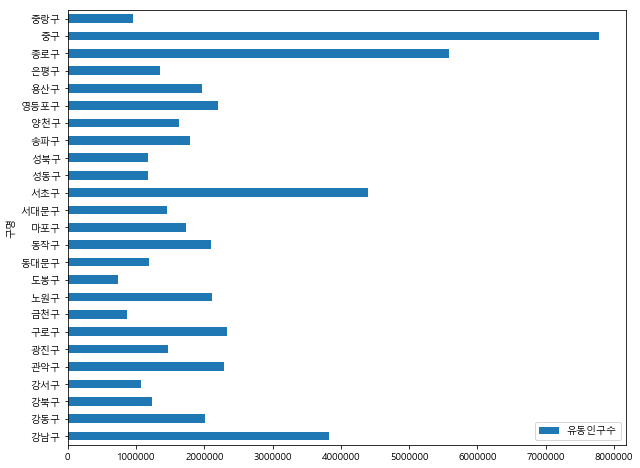

In [50]:
구별유동인구.plot(kind = 'barh',figsize = (10,8))

## 미션 3. 서울시 각 구별로 출퇴근 시간의 유동인구 분석 (출퇴근 시간은 6시-10시, 18시-21시로 가정함)


In [ ]:
유동인구.head(1)

In [ ]:
구별시간대별유동인구 = 유동인구.pivot_table(index = ['구명', '시간대'], values = '유동인구수', aggfunc = 'sum')

In [ ]:
출퇴근시간대 = list(np.unique(유동인구['시간대'])[0:3]) + list(np.unique(유동인구['시간대'])[-3:])

In [ ]:
출퇴근시간대구별유동인구 = 구별시간대별유동인구[구별시간대별유동인구.index.get_level_values('시간대').isin(출퇴근시간대)]

In [ ]:
출퇴근시간대구별유동인구 = 출퇴근시간대구별유동인구.unstack()

In [ ]:
출퇴근시간대구별유동인구

In [ ]:
출퇴근시간대구별유동인구.plot(kind = 'barh', stacked = True, figsize = (10,10))

## 미션 4. 평일 유동인구와 주말 유동인구를 분석하여, 그 차이가 가장 많이 나는 상위 5개 구 정보를 출력


In [51]:
요일별구별유동인구 = 유동인구.pivot_table(index = '구명', columns = '조사요일', values = '유동인구수', aggfunc = 'sum')
요일별구별유동인구

조사요일,금,목,수,월,토,화
구명,,,,,,
강남구,831537.0,NaN,786945.0,763788.0,678015.0,771612.0
강동구,415683.0,NaN,400101.0,387411.0,422109.0,382038.0
강북구,248163.0,NaN,246363.0,241245.0,252609.0,240585.0
강서구,216459.0,NaN,219156.0,217440.0,204612.0,218241.0
관악구,483966.0,NaN,473145.0,462741.0,414660.0,460836.0
광진구,296775.0,NaN,288054.0,281484.0,311508.0,294864.0
구로구,480456.0,NaN,474879.0,469695.0,441702.0,466620.0
금천구,179799.0,NaN,182733.0,180936.0,131775.0,187053.0
노원구,436677.0,NaN,426096.0,416238.0,421353.0,419322.0


In [52]:
요일별구별유동인구['주중'] = (요일별구별유동인구['월'] + 요일별구별유동인구['화'] + 
                         요일별구별유동인구['수']+요일별구별유동인구['목']+요일별구별유동인구['금'])/5

In [53]:
요일별구별유동인구['주말'] = 요일별구별유동인구['토']

In [54]:
요일별구별유동인구['주중주말편차'] = (요일별구별유동인구['주중']-요일별구별유동인구['주말']).abs()

In [55]:
요일별구별유동인구.head(2)

조사요일,금,목,수,월,토,화,주중,주말,주중주말편차
구명,,,,,,,,,
강남구,831537.0,NaN,786945.0,763788.0,678015.0,771612.0,NaN,678015.0,NaN
강동구,415683.0,NaN,400101.0,387411.0,422109.0,382038.0,NaN,422109.0,NaN


In [56]:
요일별구별유동인구 = 요일별구별유동인구[['주중','주말', '주중주말편차']]

In [57]:
요일별구별유동인구.sort_values(by = '주중주말편차', ascending= False)

조사요일,주중,주말,주중주말편차
구명,,,
서초구,705577.8,864129.0,158551.2
마포구,272943.0,360222.0,87279.0
동작구,338644.2,411021.0,72376.8
영등포구,355596.0,422748.0,67152.0
동대문구,192756.6,222105.0,29348.4
강남구,NaN,678015.0,NaN
강동구,NaN,422109.0,NaN
강북구,NaN,252609.0,NaN
강서구,NaN,204612.0,NaN


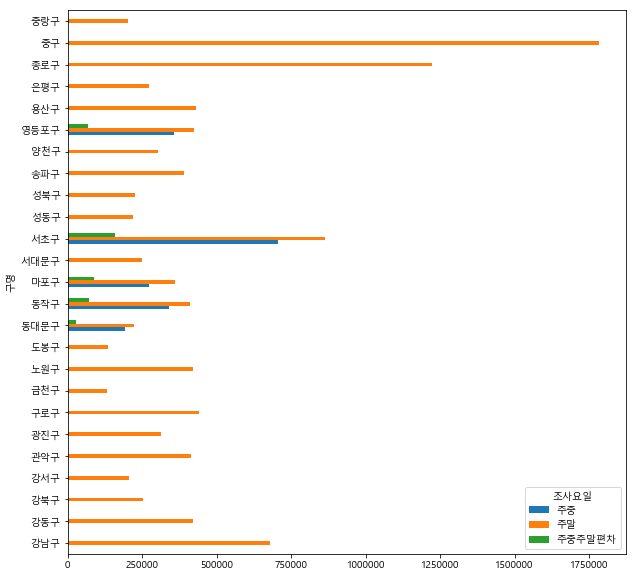

In [58]:
요일별구별유동인구.plot(kind = 'barh', figsize = (10,10))

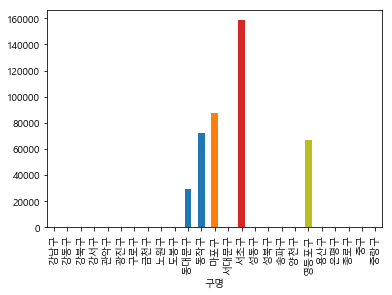

In [61]:
요일별구별유동인구.주중주말편차.plot(kind = 'bar')

## 미션 5. 유동인구의 수와 보행환경 정보를 분석하여, 보행 환경 개선이 시급한 곳 10군데를 선정. (보행환경 정보는 유동인구상세로그_2015.xlsx의 보행환경 컬럼 참고. 매우불만족(1), 약간불만족(2), 보통(3), 약간만족(4), 매우만족(5) )


In [ ]:
# 보행평균점수 - [1,5]
#불만족비율 - 전체 응답 중에 매우불만족과 약간불만족의 비율 [0,1]
#유동인구등급(유동인구수 많은 곳을 더 시급하게 개선이 필요하다고 생각) - 유동인구수를 10등급으로 나눔, [0,9]

In [ ]:
#1

In [13]:
유동인구_속성조사 = pd.read_excel('data/서울시유동인구/2_유동인구_속성조사_2015.xlsx', 
                      skiprows = [0,1,3])

In [83]:
def 보행환경(만족도):
    if 만족도 == '매우만족':
        return 5
    elif 만족도 == '약간만족':
        return 4
    elif 만족도 == '보통':
        return 3
    elif 만족도 == '약간불만족':
        return 2
    elif 만족도 == '매우불만족':
        return 1
    else:
        return 0
    
지점별보행점수 = 유동인구_속성조사.pivot_table(index = '조사지점코드', values = '보행점수',aggfunc = 'mean')


In [ ]:
#2
보행환경매트릭스=유동인구_속성조사.pivot_table(index = '조사지점코드', columns = '보행환경', values = 'ID속성조사', aggfunc = 'count',fill_value= 0 )
보행환경매트릭스['불만족비율'] = (보행환경매트릭스.매우불만족+보행환경매트릭스.약간불만족)/보행환경매트릭스.sum(axis = 1)

In [106]:
#3. 유동인구수
지점별유동인구 = 유동인구[유동인구.조사구분 =='본조사'].pivot_table(index = '조사지점코드', values= '유동인구수', aggfunc = 'mean')
지점별유동인구.head()
#1~3에서 구한 항목을 하나의 데이터프레임으로 합치기
지점별통계 = pd.concat([지점별유동인구, 보행환경매트릭스.불만족비율, 지점별보행점수], axis =1, sort = True, join = 'inner')
지점별유동인구.유동인구수.min()
지점별유동인구.유동인구수.max()
경계점 =[]
for i in range(1,10):
    경계점.append(지점별통계.유동인구수.quantile(i/10))
경계점
# 등급 나누기
지점별통계['유동인구등급']=np.digitize(지점별통계.유동인구수,경계점)
지점별통계.head()
#개선시급도
지점별통계['개선시급도'] = 지점별통계.불만족비율*지점별통계.유동인구등급
지점별통계.head(10)
환경개선지점50 = 지점별통계.sort_values(by = '개선시급도', ascending = False).head(50)
환경개선지점50

,유동인구수,불만족비율,보행점수,유동인구등급,개선시급도
조사지점코드,,,,,
23-076,1928.142857,1.00,2.633333,9,9.00
23-034,1389.728571,1.00,1.927778,9,9.00
23-285,1178.742857,1.00,2.383333,9,9.00
23-075,1236.000000,1.00,2.005556,9,9.00
23-236,1166.228571,0.95,1.983333,9,8.55
01-2095,2193.857143,0.95,1.755556,9,8.55
13-5002,1972.414286,0.90,2.111111,9,8.10
04-2026,980.528571,1.00,2.144444,8,8.00
21-039,1130.057143,0.85,2.450000,9,7.65


In [107]:
# 지도에 환경개선지점 시각화
np.unique(조사지점.조사구분)
# index 값이 유일해야 concat 가능
조사지점2 = 조사지점[조사지점.조사구분 =='본조사'].set_index('조사지점코드')[['조사지점명','X좌표','Y좌표']]
환경개선50  =pd.concat([환경개선지점50, 조사지점2], axis = 1, join = 'inner')

In [123]:
환경개선지점50['위경도'] = 환경개선지점50.apply(lamda 지점 : convert_locatin(지점.X좌표, 지점.Y좌표), axis=1)
# X좌표, Y좌표를 위도와 경도로 변환하는 함수 선언
def convert(x,y):
    inProj = Proj(init = 'epsg:5181')
    outProj = Proj(init = 'epsg:4326')
    x2,y2 = transform(inProj, outProj, x, y)
    return [y2, x2]
map2 = foluim.Map(location = [37.56535,126.977], zoom_start = 15)
for row in 환경개선지점50.interrows():
    folium.Marker(row[1]['위경도'], popup =row[1]['조사지점명'])add_to(map2)

SyntaxError: invalid syntax (<ipython-input-123-ca48dd2c6a7b>, line 1)

In [121]:
def generate_msg(x):
    string = '조사지점명: {0.조사지점명}\n개선시급도:{0.개선시급도:.2f}'.format()
    return string

In [122]:
map2

NameError: name 'map2' is not defined

In [119]:
#ClusterMarker 실습
map3 = folium.Map(location = [37.56535,126.977], zoom_start = 15)
from folium.plugins import MarkerCluster
mc = MarkerCluster().add_to(map3)

In [120]:
# 각각의 마커를 클러스터 마커에 추가
for row in 환경개선지점50.interrows():
    folium.Marker(row[1]['위경도'], popup =row[1]['조사지점명'])add_to(mc)

SyntaxError: invalid syntax (<ipython-input-120-75761e4ea3f8>, line 3)

In [116]:
map3

NameError: name 'map3' is not defined

In [15]:
def 연령대(나이):
    if 나이 == '65세이상':
        return 3
    else : 
        return 0
    

In [19]:
def 방문횟수(횟수):
    if 횟수 =='매일':
        return 6
    elif 횟수 == '주3~5회':
        return 5
    elif 횟수 == '주1~2회':
        return 4
    elif 횟수 == '월1~2회':
        return 3
    elif 횟수 == '6개월1~3회':
        return 2
    elif 횟수 =='오늘처음':
        return 1
    else:
        return 0

In [16]:
유동인구_속성조사['보행점수'] = 유동인구_속성조사.보행환경.apply(보행환경)

In [17]:
유동인구_속성조사['연령대점수'] = 유동인구_속성조사.연령대.apply(연령대)

In [30]:
유동인구_속성조사['방문횟수점수'] = 유동인구_속성조사.방문횟수.apply(방문횟수)
유동인구_속성조사.head()


,ID속성조사,조사지점코드,조사일자,조사요일,남여구분,조사시간대,조사시간대_텍스트,연령대,거주지,통행주목적,방문횟수,동행자명,교통수단,보행환경,직업명,년도,보행점수,연령대점수,방문횟수점수
0,1,01-003,1016,금,여자,NaN,오전11시~오후2시,50-54세,종로구,업무관련,주1~2회,NaN,NaN,약간만족,전문/자유직,2015,4,0,4
1,2,01-003,1016,금,남자,NaN,오전11시~오후2시,60-64세,성북구,업무관련,주3~5회,NaN,NaN,매우만족,일용/작업직,2015,5,0,5
2,3,01-003,1016,금,남자,NaN,오전11시~오후2시,65세이상,종로구,업무관련,주3~5회,NaN,NaN,약간만족,일용/작업직,2015,4,3,5
3,4,01-003,1016,금,남자,NaN,오전7시30분~11시,45-49세,서대문구,출근,매일,NaN,NaN,약간만족,사무/기술직,2015,4,0,6
4,5,01-003,1016,금,남자,NaN,오전7시30분~11시,35-39세,도봉구,출근,매일,NaN,NaN,매우만족,사무/기술직,2015,5,0,6


,보행점수,연령대점수,방문횟수점수
0,4,0,4
1,5,0,5
2,4,3,5
3,4,0,6
4,5,0,6


In [67]:
유동인구_속성조사.head()

,ID속성조사,조사지점코드,조사일자,조사요일,남여구분,조사시간대,조사시간대_텍스트,연령대,거주지,통행주목적,방문횟수,동행자명,교통수단,보행환경,직업명,년도,보행점수,연령대점수,방문횟수점수
0,1,01-003,1016,금,여자,NaN,오전11시~오후2시,50-54세,종로구,업무관련,주1~2회,NaN,NaN,약간만족,전문/자유직,2015,4,0,4
1,2,01-003,1016,금,남자,NaN,오전11시~오후2시,60-64세,성북구,업무관련,주3~5회,NaN,NaN,매우만족,일용/작업직,2015,5,0,5
2,3,01-003,1016,금,남자,NaN,오전11시~오후2시,65세이상,종로구,업무관련,주3~5회,NaN,NaN,약간만족,일용/작업직,2015,4,3,5
3,4,01-003,1016,금,남자,NaN,오전7시30분~11시,45-49세,서대문구,출근,매일,NaN,NaN,약간만족,사무/기술직,2015,4,0,6
4,5,01-003,1016,금,남자,NaN,오전7시30분~11시,35-39세,도봉구,출근,매일,NaN,NaN,매우만족,사무/기술직,2015,5,0,6


In [74]:
보행점수 =유동인구_속성조사.iloc[:,16:19].mean(axis=1)
유동인구_속성조사['보행점수']=보행점수
유동인구_속성조사.head()

,ID속성조사,조사지점코드,조사일자,조사요일,남여구분,조사시간대,조사시간대_텍스트,연령대,거주지,통행주목적,방문횟수,동행자명,교통수단,보행환경,직업명,년도,보행점수,연령대점수,방문횟수점수,지점별보행점수
0,1,01-003,1016,금,여자,NaN,오전11시~오후2시,50-54세,종로구,업무관련,주1~2회,NaN,NaN,약간만족,전문/자유직,2015,2.222222,0,4,2.666667
1,2,01-003,1016,금,남자,NaN,오전11시~오후2시,60-64세,성북구,업무관련,주3~5회,NaN,NaN,매우만족,일용/작업직,2015,2.777778,0,5,3.333333
2,3,01-003,1016,금,남자,NaN,오전11시~오후2시,65세이상,종로구,업무관련,주3~5회,NaN,NaN,약간만족,일용/작업직,2015,4.000000,3,5,4.000000
3,4,01-003,1016,금,남자,NaN,오전7시30분~11시,45-49세,서대문구,출근,매일,NaN,NaN,약간만족,사무/기술직,2015,3.111111,0,6,3.333333
4,5,01-003,1016,금,남자,NaN,오전7시30분~11시,35-39세,도봉구,출근,매일,NaN,NaN,매우만족,사무/기술직,2015,3.222222,0,6,3.666667


In [75]:
지점별유동인구 = 유동인구.pivot_table(index = '조사지점코드', values = '유동인구수', aggfunc = 'sum')
지점별유동인구.head()

,유동인구수
조사지점코드,
01-003,2895.0
01-004,13872.0
01-005,10509.0
01-008,5316.0
01-009,5637.0


In [48]:
유동인구.head(1)

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도
0,1,30-001,지하철,금,07시-08시,129.0,2015


In [76]:
지점별 = pd.concat([지점별유동인구, 지점별보행점수], axis = 1)
지점별

,유동인구수,0
01-003,2895.0,NaN
01-004,13872.0,NaN
01-005,10509.0,NaN
01-008,5316.0,NaN
01-009,5637.0,NaN
01-016,62268.0,NaN
01-019,69288.0,NaN
01-020,166989.0,NaN
01-021,33354.0,NaN
01-028,49569.0,NaN


In [52]:
지점별 = 지점별.join(측정위치.set_index('조사지점코드')['조사지점명'])

In [54]:
지점별.sort_values(by = 0)

,유동인구수,0,조사지점명
17024,NaN,0.666667,NaN
1575,NaN,0.666667,NaN
3225,NaN,0.666667,NaN
19744,NaN,0.666667,NaN
1529,NaN,0.666667,NaN
1515,NaN,0.666667,NaN
1502,NaN,0.666667,NaN
15783,NaN,0.666667,NaN
2050,NaN,0.666667,NaN
1475,NaN,0.666667,NaN
